## El método de Newton-Raphson

Aquí vamos a estudiar la convergencia y ver que los resultados se ajustan a los valores teóricos.

La iteración del método es:

$$ 
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
$$

Si el valor inicial $x_0$ está lo suficientemente cercano a una raíz el método converge a un valor, que llamaremos $x = \lim_{n \to \infty} x_n$, que satisface $f(x) = 0$

Queremos ver que tan rápido converge este método. Para ello miramos el error en cada paso, el cual viene dado por: 

$$
e_{n} := x - x_n
$$

Restando a la iteración de ambos lados $x$ obtenemos

$$
e_{n+1} = e_{n} + \frac{f(x_n)}{f'(x_n)} = e_{n} - \frac{f(x) - f(x_n)}{f'(x_n)}
$$

Usando ahora el teorema del valor medio $f(x) - f(x_n) = f'(x_n)(x-x_n) + f''(\zeta)(x-x_n)^2 $ vemos entonces que:

$$
e_{n+1} = \frac{f''(\zeta)}{f'(x_n)}e_{n}^2 \leq a e_{n}^2.
$$
Donde $a = \sup|\frac{f''(\zeta)}{f'(\eta)}|$ donde $\zeta$ y $\eta$ son valores de $x$ en algún conjunto acotado donde la iteración está convirgiendo. 

Reescalando $\tilde{e} := ae$ la relación resulta:

$$
\tilde{e}_{n+1} \leq  \tilde{e}_{n}^2.
$$

Se puede ver que esta desigualdad implica que $\tilde{e}_{n} \leq \hat{e}_{n}$,
la cual es la solución de la relación de recurrencia:

$$
\hat{e_{n+1}} =  \hat{e}_{n}^2,
$$
cuya solución es:

$$
\hat{e}_{n+1} = \hat{e}_{0}^{2^n}.
$$

De hecho, 

$$
\hat{e}_{n}^2 = (\hat{e}_{0}^{2^n})^2 = \hat{e}_{0}^{2^{(n+1)}} = \hat{e}_{n+1}.
$$

Vemos entonces que el error está acotado por dicho decaimiento (ya que suponemos que el dato inicial es tal que $\hat{e}_{0} = \tilde{e}_{0} = ae_0 < 1$.

Para constar esto haremos dos sucesiones, para un caso donde conocemos la solución exacta.
Una será $e_n$ y la otra una cota para el mismo que se puede ver está dada por 
$E_n := |x_{n+1}-x_n|$.

Note que $E_n = |e_{n+1} - e_{n}| \leq 2e_n$ 



In [1]:
using Plots # para plotear los resultados

In [2]:
#tipo = Float64
tipo = BigFloat # Lo hacemos con alta precisión para tener más puntos de convergencia

BigFloat

In [3]:
function NR(f,df,x₀::tipo; xₑ::tipo=tipo(0.), tolₓ::tipo=tipo(1.e-30),tol_f::tipo=tipo(1.e-30),max_iter::Int64=100)
    x = x₀
    iter = 0
    er = Array{tipo,1}(undef,max_iter)
    Er = Array{tipo,1}(undef,max_iter)
    dx = 1.
    while ((abs(dx/x) > tolₓ) || (abs(f(x)) > tol_f)) && iter < max_iter
        iter = iter + 1
        dx = f(x)/df(x)
        x = x - dx
        Er[iter] = abs(dx/x)
        er[iter] = abs((xₑ - x)/x)
        
    end
    return (f(x), x, Er[1:iter], er[1:iter])
end

NR (generic function with 1 method)

In [4]:
function f(x::tipo)::tipo
    return (x-1)*x^3
end

function df(x::tipo)::tipo
    return x^3 + 3*(x-1)*x^2
end

df (generic function with 1 method)

In [5]:
#plot(f,tipo(-1),tipo(2))

In [6]:
#x₀ = big"0.9"
x₀ = tipo(0.9)
xₑ = tipo(1.0)
f(x₀)
df(x₀)

0.486000000000000095923269327613528938298689075479470172753765904116336023430849

In [7]:
#t_x = tipo(10.0^20)
#t_f = tipo(10.0^20)
sol = NR(f,df,x₀,xₑ=xₑ)

(0.0, 1.0, BigFloat[0.1428571428571428118276316479527985807094866942434694360494339648729834079184491, 0.04347826086956519500495476496219040950275016588458414687228976817152917388255545, 0.006134969325153367695877741092502423533808785935243832864731090904760742594550167, 0.0001142900681930737768420954798308666672457013130496407467403938690454051280978069, 3.919561532993978985393020256214175076791051079751914917902898838131251227985401e-08, 4.608889144574282718776838261253038271549730381781891047224029766652240122526274e-15, 6.372557744092457794617784925090601106078422537306604710919714099474038416226754e-29, 1.218284766053782644185830857117536973662015150154608091014340078993008728628511e-56], BigFloat[0.04761904761904759219415208767573539079119354445656095802233239693417173809975658, 0.006211180124223595783795984070317471932665067857965216725063943143963846325799402, 0.0001143161986053421318773644667225725982844228840820757904992783588046555968702711, 3.9195618402532552903480337558896

Grafiquemos los errores ahora. Como veran no se ajustan a ninguna función fácilmente reconocible, ni en escala lineal ni en logarítmica. 
Pero vemos que la podemos ajustar con la ley de decaimiento que obtuvimos. De hecho, tanto el error como su cota pueden ser ajustadas del mismo modo.


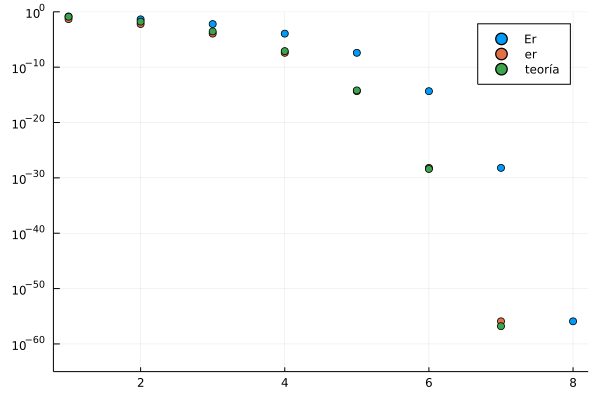

In [8]:
scatter(sol[3][1:8],yscale=:log10, ylim=(1e-65,1), label="Er")
scatter!(sol[4][1:8], label="er")
e₀ = 0.6 # ajustamos para que de similar a cualquiera de las dos
e₀ = 0.36
e = [e₀^(2^i) for i ∈ 1:8] #ajustamos 
scatter!(e, label="teoría")

Visualmente se puede obtener una vista rápida graficando el log del log. Cómo ven da una recta. Cúal es su pendiente?

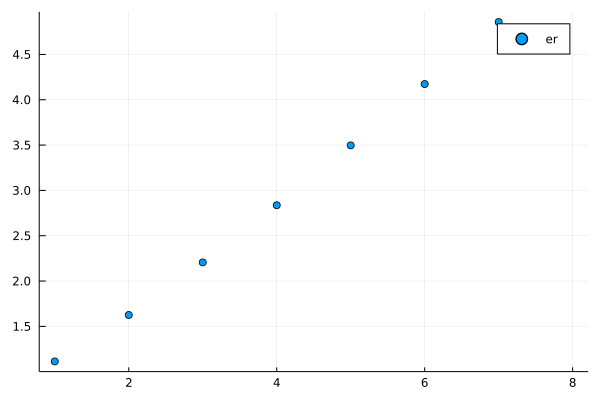

In [10]:
scatter(log.(abs.(log.(sol[4][1:8]))), label="er")